## Question 1
The following table indicates the number of 6-point scores in an American rugby match in the 1979 season.

![](table1.png)

Based on these results, we create a Poisson distribution with the sample mean parameter  = 2.435. Is there any reason to believe that at a .05 level the number of scores is a Poisson variable?

In [2]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
from scipy.stats import poisson

2.435267857142857
8 [ 35  99 104 110  62  25  10   3]
8 [ 39.23328036  95.54354658 116.33706397  94.43730416  57.49503284
  28.00316108  11.36586635   5.58474467]
Power_divergenceResult(statistic=6.490217386995407, pvalue=0.4838104817385577)
False
False -> I cannot reject the H0, this can be a poisson distribution.


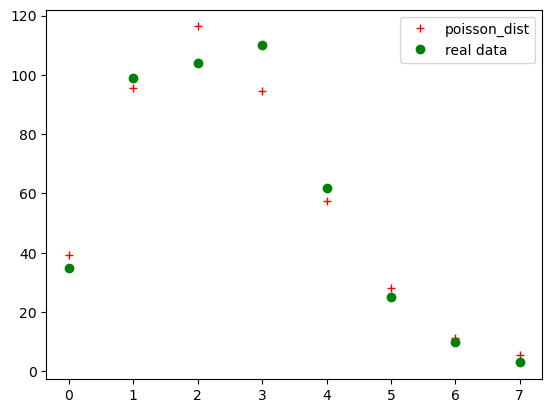

In [39]:
# your answer here

#prepare the data:
Obs = np.array([35,99,104,110,62,25,10,3])
# check: Obs.sum() ->448

#poisson: needs only parameter lambda = mean 
# p = mean
#mean: 
## calculated with number of scores + 1 to avoid not counting the zero -> in the end minus 1 necessary.
## instead of "7 or more" -> reading that as score = 7.
mean = (np.array([(i+1)*val for i,val in enumerate(Obs)]).sum()/sum(Obs)) -1
print(mean)
poisson_dist = poisson(mean)

poisson_pmfs = np.array([poisson_dist.pmf(i) for i in range(0,7)])
#append the last value for "7 or more":
poisson_pmfs = np.append(poisson_pmfs, 1 - poisson_pmfs.sum())
poisson_pmfs
# #important, this is probabilities, so get this times number of observations for the real E.

Exp = poisson_pmfs*sum(Obs)
print(len(Obs), Obs)
print(len(Exp), Exp)

chisquare = st.chisquare(f_obs = Obs, f_exp = Exp) 
print(chisquare)
print(chisquare.pvalue < 0.05)

# #pvalue < 0.05 
# False 
print("False -> I cannot reject the H0, this can be a poisson distribution.")

##just for fun, visualize it:
x = np.arange(0,8)
plt.plot(x, Exp, "r+", label='poisson_dist')
plt.plot(x, Obs, "go", label='real data')
plt.legend()
plt.show()

## BONUS/OPTIONAL - Question 2
Let's analyze a discrete distribution. To analyze the number of defective items in a factory in the city of Medellín, we took a random sample of n = 60 articles and observed the number of defectives in the following table:

![](table2.png)

A poissón distribution was proposed since it is defined for x = 0,1,2,3, .... using the following model:

![](image1.png)

For some extra insights check the following link: https://online.stat.psu.edu/stat504/node/63/ 

Does the distribution of defective items follow this distribution?

5 60 [32 15  0  9  4]
5 59.99999999999999 [22.8209254  22.06022788 10.66244348  3.43567623  1.02072701]
Power_divergenceResult(statistic=34.32169618960069, pvalue=6.401393042020276e-07)
True
True -> I can reject the H0, this data is not distributed like a poisson distribution.


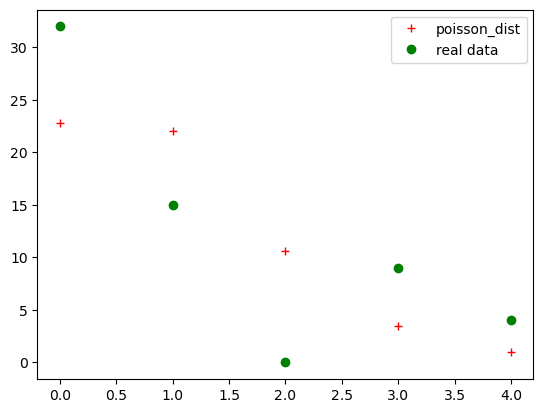

In [51]:
# your code here
#prepare the data:
Obs = np.array([32,15,0,9,4])
# check: Obs.sum() ->60

#poisson: needs only parameter lambda = mean 
# p = mean
#mean: 
## calculated with number of scores + 1 to avoid not counting the zero -> in the end minus 1 necessary.
mean = (np.array([(i+1)*val for i,val in enumerate(Obs)]).sum()/sum(Obs)) -1
mean
poisson_dist = poisson(mean)

poisson_pmfs = np.array([poisson_dist.pmf(i) for i in range(0,4)])
#append the last value for "largest or more":
poisson_pmfs = np.append(poisson_pmfs, 1 - poisson_pmfs.sum())
poisson_pmfs

Exp = poisson_pmfs*sum(Obs)
print(len(Obs), sum(Obs), Obs)
print(len(Exp), sum(Exp), Exp)


chisquare = st.chisquare(f_obs = Obs, f_exp = Exp) 
print(chisquare)
print(chisquare.pvalue < 0.05)
# True 
print("True -> I can reject the H0, this data is not distributed like a poisson distribution.")

# ##just for fun, visualize it:
x = np.arange(0,5)
plt.plot(x, Exp, "r+", label='poisson_dist')
plt.plot(x, Obs, "go", label='real data')
plt.legend()
plt.show()

## Question 3
A quality control engineer takes a sample of 10 tires that come out of an assembly line, and would like to verify on the basis of the data that follows, if the number of tires with defects observed over 200 days, if it is true that 5% of all tires have defects (that is, if the sample comes from a binomial population with n = 10 and p = 0.05). 

![](table3.png)


3 200 [138  53   9]
3 200.0 [119.74738785  63.02494097  17.22767118]
Power_divergenceResult(statistic=8.306179519542757, pvalue=0.015715783395951262)
True
True -> I can reject the H0, this data is not distributed along this binominal distribution.


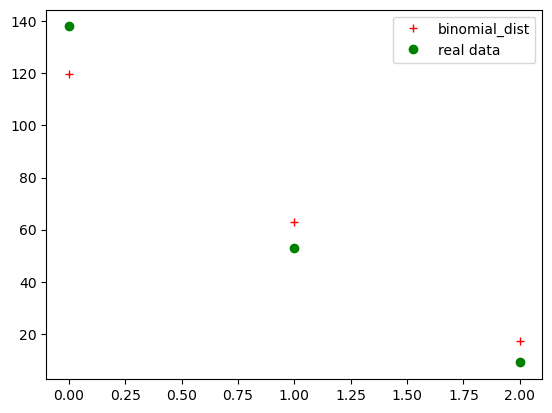

In [63]:
# your answer here
from scipy.stats import binom

#prepare the data:
Obs = np.array([138,53,9])

# binom: needs n and p
n = 10
p = 0.05
binomial_dist = binom(n,p)

binomial_pmfs = np.array([binomial_dist.pmf(i) for i in range(0,2)])
#append the last value for "largest or more":
binomial_pmfs = np.append(binomial_pmfs, 1 - binomial_pmfs.sum())
binomial_pmfs

Exp = binomial_pmfs*sum(Obs)
print(len(Obs), sum(Obs), Obs)
print(len(Exp), sum(Exp), Exp)

chisquare = st.chisquare(f_obs = Obs, f_exp = Exp) 
print(chisquare)
print(chisquare.pvalue < 0.05)
# True 
print("True -> I can reject the H0, this data is not distributed along this binominal distribution.")


#check it out visually 
x = np.arange(0,3)
plt.plot(x, Exp, "r+", label='binomial_dist')
plt.plot(x, Obs, "go", label='real data')
plt.legend()
plt.show()

## Question 4
A researcher gathers information about the patterns of Physical Activity of children in the fifth grade of primary school of a public school. He defines three categories of physical activity (Low, Medium, High). He also inquires about the regular consumption of sugary drinks at school, and defines two categories (Yes = consumed, No = not consumed). We would like to evaluate if there is an association between patterns of physical activity and the consumption of sugary drinks for the children of this school, at a level of 5% significance. The results are in the following table: 

![](table4.png)

In [68]:
#your answer here

# H0: there is no influence between activity and sugary drinks

drinks_activity = [[32, 12],
                  [14, 22],
                  [6, 9]]

#significance level
alpha = 0.05

chi2_contingency = st.chi2_contingency(drinks_activity) 
chi2_contingency.pvalue<alpha
print("True: I can reject H0, in this survey there is an influence between physical activity and the consumption of sugary drinks.")

True: I can reject H0, in this survey there is an influence between physical activity and the consumption of sugary drinks.
